In [1]:
# pip install dlc2kinematics

In [2]:
import dlc2kinematics as dlck
import pandas as pd
import numpy as np

In [3]:
# load data
df, bodyparts, scorer = dlck.load_data('F:\\G3\\W01\\42136_RF\\42136_RF_W01VideoProcessed2021-12-07T12_11_59DLC_resnet50_Dystonia_TestApr21shuffle1_500000_filtered.h5')

In [4]:
# create a dataframe with the velocity (in x and y) of the 'nose'
df_vel_nose_tailbase = dlck.compute_velocity(df,bodyparts=['nose', 'tailbase'])

In [5]:
# show the dataframe 
df_vel_nose_tailbase

scorer    DLC_resnet50_Dystonia_TestApr21shuffle1_500000                       \
bodyparts                                           nose                        
coords                                                 x         y likelihood   
0                                               0.753365  5.572121   0.999991   
1                                               0.753365  5.572121   0.999922   
2                                               0.284904  4.572838   0.999950   
3                                               0.000000  5.358597   0.999933   
4                                              -0.192986  6.799973   0.999900   
...                                                  ...       ...        ...   
18859                                          -6.499466  0.200775   0.999897   
18860                                          -6.638123  0.217621   0.999689   
18861                                          -6.444443  0.000000   0.998104   
18862                                          -5.532776 -0.689331   0.999840   
18863                                          -5.532776 -0.689331   0.994408   

scorer                                        
bodyparts      tailbase                       
coords                x         y likelihood  
0         -2.683273e-14  2.394772   0.999942  
1          0.000000e+00  2.394772   0.999990  
2         -8.764801e-01  3.957558   0.999995  
3         -1.132935e+00  4.234097   0.999959  
4         -7.757187e-01  3.850792   0.999990  
...                 ...       ...        ...  
18859     -7.954437e+00 -2.924957   0.999962  
18860     -7.679153e+00  0.000000   0.999947  
18861     -7.576782e+00  0.000000   0.999951  
18862     -8.812607e+00 -0.260498   0.999967  
18863     -8.812607e+00 -0.260498   0.999988  

[18864 rows x 6 columns]

In [6]:
# change columns names
df_vel_nose_tailbase.columns = ['nose v(x)', 'nose v(y)', 'nose likelihood', 'tailbase v(x)', 'tailbase v(y)', 'tailbase likelihood']
# show the dataframe
df_vel_nose_tailbase

,nose v(x),nose v(y),nose likelihood,tailbase v(x),tailbase v(y),tailbase likelihood
0,0.753365,5.572121,0.999991,-2.683273e-14,2.394772,0.999942
1,0.753365,5.572121,0.999922,0.000000e+00,2.394772,0.999990
2,0.284904,4.572838,0.999950,-8.764801e-01,3.957558,0.999995
3,0.000000,5.358597,0.999933,-1.132935e+00,4.234097,0.999959
4,-0.192986,6.799973,0.999900,-7.757187e-01,3.850792,0.999990
...,...,...,...,...,...,...
18859,-6.499466,0.200775,0.999897,-7.954437e+00,-2.924957,0.999962
18860,-6.638123,0.217621,0.999689,-7.679153e+00,0.000000,0.999947
18861,-6.444443,0.000000,0.998104,-7.576782e+00,0.000000,0.999951
18862,-5.532776,-0.689331,0.999840,-8.812607e+00,-0.260498,0.999967


In [7]:
import math

In [8]:
#convert the values to float
for col in df_vel_nose_tailbase:
    df_vel_nose_tailbase[col] = pd.to_numeric(df_vel_nose_tailbase[col], downcast="float")

In [9]:
# create two new columns with v = vx**2 + vy**2, for both the nose and the tailbase

velocity_nose = np.sqrt(df_vel_nose_tailbase['nose v(x)']**2+df_vel_nose_tailbase['nose v(y)']**2)
velocity_tailbase = np.sqrt(df_vel_nose_tailbase['tailbase v(x)']**2+df_vel_nose_tailbase['tailbase v(y)']**2)
df_vel_nose_tailbase['Velocity nose (px/frame)'] = velocity_nose
df_vel_nose_tailbase['Velocity tailbase (px/frame)'] = velocity_tailbase

In [10]:
# show the dataframe
df_vel_nose_tailbase

,nose v(x),nose v(y),nose likelihood,tailbase v(x),tailbase v(y),tailbase likelihood,Velocity nose (px/frame),Velocity tailbase (px/frame)
0,0.753365,5.572121,0.999991,-2.683273e-14,2.394772,0.999942,5.622818,2.394772
1,0.753365,5.572121,0.999922,0.000000e+00,2.394772,0.999990,5.622818,2.394772
2,0.284904,4.572838,0.999950,-8.764801e-01,3.957558,0.999995,4.581705,4.053453
3,0.000000,5.358597,0.999933,-1.132935e+00,4.234097,0.999959,5.358597,4.383049
4,-0.192986,6.799973,0.999900,-7.757187e-01,3.850792,0.999990,6.802711,3.928147
...,...,...,...,...,...,...,...,...
18859,-6.499466,0.200775,0.999897,-7.954437e+00,-2.924957,0.999962,6.502566,8.475166
18860,-6.638123,0.217621,0.999689,-7.679153e+00,0.000000,0.999947,6.641689,7.679153
18861,-6.444443,0.000000,0.998104,-7.576782e+00,0.000000,0.999951,6.444443,7.576782
18862,-5.532776,-0.689331,0.999840,-8.812607e+00,-0.260498,0.999967,5.575552,8.816456


In [11]:
# search for NaN's (not a number)
np.sqrt(df_vel_nose_tailbase['nose v(x)']**2+df_vel_nose_tailbase['nose v(y)']**2).isnull().values.any()

False

In [12]:
# check the type of data of the dataframe elements
for col in df_vel_nose_tailbase.columns:
    print(df_vel_nose_tailbase[col].dtype)

float32
float32
float32
float32
float32
float32
float32
float32


In [13]:
# define tresholds for gaits
    # standing steel: vel < 5cm/s
    # walking: 5 < vel < 10 cm/s
    # troting: vel > 10 cm/s

# convert from px/frame to cm/s (it will be an estimate, since the video is distorted)
# 40 cm --- 600 px
# 1 cm --- ? px

#ONLY AN ESTIMATE!!! (NOT AN ACURATE CONVERSION)
# convert px to cm
open_field_length_cm = 40
open_field_length_px = 600
ratio_px_to_cm = open_field_length_px/open_field_length_cm
ratio_px_to_cm

# convert frames to seconds (30 frames = 1 sec)
acquisition_rate_hz = 30 

15.0

In [22]:
# create a new dataframe containing only the velocities (px/frame)
df_vel_pxfr = df_vel_nose_tailbase[['Velocity nose (px/frame)', 'Velocity tailbase (px/frame)']]
# show the new dataframe
df_vel_pxfr

,Velocity nose (px/frame),Velocity tailbase (px/frame)
0,5.622818,2.394772
1,5.622818,2.394772
2,4.581705,4.053453
3,5.358597,4.383049
4,6.802711,3.928147
...,...,...
18859,6.502566,8.475166
18860,6.641689,7.679153
18861,6.444443,7.576782
18862,5.575552,8.816456


In [28]:
df_vel_nose_tailbase['Velocity tailbase (px/frame)'].sort_values()

13489     0.000000
8932      0.000000
7134      0.000000
18161     0.000000
9614      0.000000
           ...    
6030     83.607567
7659     85.948029
7737     86.356171
7646     92.371826
7647     92.489670
Name: Velocity tailbase (px/frame), Length: 18864, dtype: float32

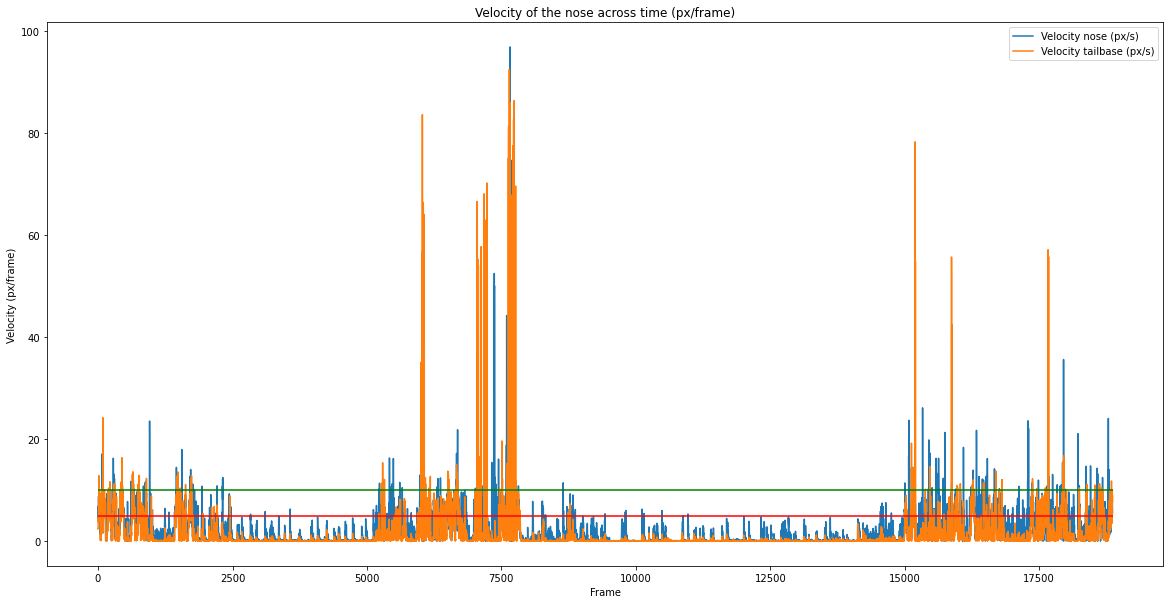

In [19]:
# plot the velocity of a bodypart
import numpy as np
import matplotlib.pyplot as plt

#use .astype() to convert from object to float
df_vel_nose_tailbase[['Velocity nose (px/s)', 'Velocity tailbase (px/s)']].plot(kind='line', 
                        xlabel='Frame', 
                        ylabel='Velocity (px/frame)',
                        title='Velocity of the nose across time (px/frame)',
                        figsize=(20,10))

walking_treshold = 5
plt.hlines(walking_treshold, 0, len(df_vel_nose_tailbase), color='red')

troting_treshold = 10
plt.hlines(troting_treshold, 0, len(df_vel_nose_tailbase), color='green')

# plot everything in the same figure
plt.show()

In [21]:
# count frames where velocity is in each of the intevals
bins = [0, walking_treshold, troting_treshold, 500]
series_piechart = df_vel_nose_tailbase['Velocity tailbase (px/s)'].value_counts(bins=bins, sort=False) 

# show df_piechart
series_piechart

(-0.001, 5.0]    17159
(5.0, 10.0]       1433
(10.0, 500.0]      272
Name: Velocity tailbase (px/s), dtype: int64

In [22]:
df_piechart = pd.DataFrame(series_piechart)
df_piechart

,Velocity tailbase (px/s)
"(-0.001, 5.0]",17159
"(5.0, 10.0]",1433
"(10.0, 500.0]",272


In [23]:
# rename the columns and indexes of the df
# df_new = df.rename(columns={'A': 'Col_1'}, index={'ONE': 'Row_1'})

array([<AxesSubplot:ylabel='Velocity tailbase (px/s)'>], dtype=object)

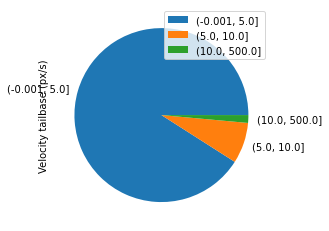

In [24]:
df_piechart.plot(kind='pie', subplots=True)